In [1]:
using JuMP, Clp, Plots

In [2]:
N = 1
d = collect(60:N:150)
p = (1/size(d,1))*ones(size(d,1));

In [3]:
function Q(x,ξ)
    m = Model(Clp.Optimizer)
    set_optimizer_attribute(m, "LogLevel",0)
    @variables(m, 
    begin
        y ≥ 0
        w ≥ 0
    end)

    @constraints(m,
    begin
        y ≤ ξ
        aux, y + w ≤ x
    end)

    @objective(m, Min, -25 * y - 5 * w)
    optimize!(m)
    return objective_value(m), shadow_price(aux)
end

Q (generic function with 1 method)

In [4]:
master = Model(Clp.Optimizer)
set_optimizer_attribute(master, "LogLevel",0)
@variable(master,x>=0)
@variable(master,α)
@constraint(master, α >= -9999)
@constraint(master, x<=150)
@objective(master, Min, 10*x + α)
optimize!(master);

iterator = 1
Q̂i_list = []
πi_list = []
x̂i_list = []
LB_list = []
UB_list = []
LB = nothing
UB = nothing
x̂i = nothing
while true
    LB = objective_value(master)
    if iterator == 1
        x = master[:x]
        x̂i = value(x)
        append!(x̂i_list, x̂i)

    else
        aux = copy(master)
        set_optimizer(aux, Clp.Optimizer)
        set_optimizer_attribute(aux, "LogLevel",0)
        x_aux = aux[:x]
        γ = 0.5
        obj = objective_function(aux)
        @variable(aux, θ)
        @constraints(aux,begin
                obj <= γ*LB + (1-γ)*UB
                θ >= x_aux - x̂i
                θ >= -(x_aux - x̂i)
            end)
        @objective(aux, Min, θ)
        optimize!(aux)
        x̂i = value(x_aux)
        append!(x̂i_list, x̂i)
    end
    
    slave_Q̄i_list = []
    slave_πi_list = []
    for ξ in d
        q̂, pî = Q(x̂i,ξ)
        append!(slave_Q̄i_list, q̂)
        append!(slave_πi_list, pî)
    end

    Q̂i = sum(slave_Q̄i_list)/size(slave_Q̄i_list,1)
    πi = sum(slave_πi_list)/size(slave_πi_list,1)


    l_i = x-> Q̂i + πi*(x-x̂i)
    append!(Q̂i_list, Q̂i)
    append!(πi_list, πi)

    UB = 10*x̂i + Q̂i
    append!(LB_list, LB)
    append!(UB_list, UB)
        
    if trunc(LB, digits=5) == trunc(UB, digits=5)
        println("**SOLUTION FOUND**")
        println( "Iteration $(iterator): x̂$(iterator): $(x̂i) | Lower Bound: $(LB) & Uper Bound: $(UB)")
        println("===========")
        break
    else
        println( "Iteration $(iterator): x̂$(iterator): $(x̂i) | Lower Bound: $(LB) & Uper Bound: $(UB)")
        println("===========")
    end  
    
    @constraint(master, α >= l_i(x))
    optimize!(master);

    iterator += 1
end

Iteration 1: x̂1: 0.0 | Lower Bound: -9999.0 & Uper Bound: 0.0
Iteration 2: x̂2: 75.0 | Lower Bound: -2250.0 & Uper Bound: -1098.6263736263736
Iteration 3: x̂3: 112.5 | Lower Bound: -1959.8901098901097 & Uper Bound: -1378.8186813186812
Iteration 4: x̂4: 131.24999999999991 | Lower Bound: -1504.5054945054944 & Uper Bound: -1403.0357142857147
Iteration 5: x̂5: 126.62500000000054 | Lower Bound: -1410.6593406593406 & Uper Bound: -1404.2376373626325
Iteration 6: x̂6: 127.81250000000288 | Lower Bound: -1404.8901098901067 & Uper Bound: -1404.3853021977968
Iteration 7: x̂7: 128.65625000000122 | Lower Bound: -1404.4780219780168 & Uper Bound: -1404.2874313186785
Iteration 8: x̂8: 128.32812500000492 | Lower Bound: -1404.3956043956 & Uper Bound: -1404.3415178571422
Iteration 9: x̂9: 128.16406249999824 | Lower Bound: -1404.3956043956 & Uper Bound: -1404.3685611263704
Iteration 10: x̂10: 128.0820312500027 | Lower Bound: -1404.3956043955998 & Uper Bound: -1404.3820827609845
Iteration 11: x̂11: 128.041

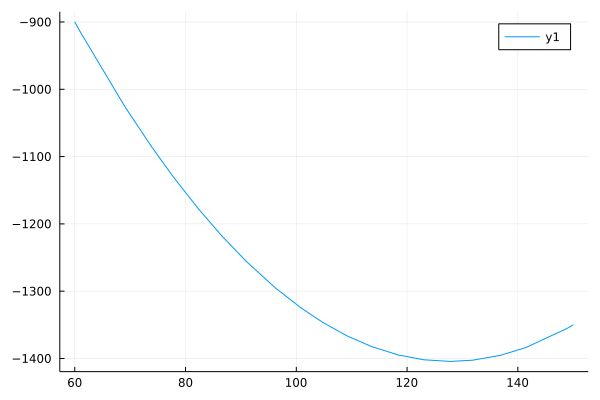

Function f(x) evaluated in range [60:150]

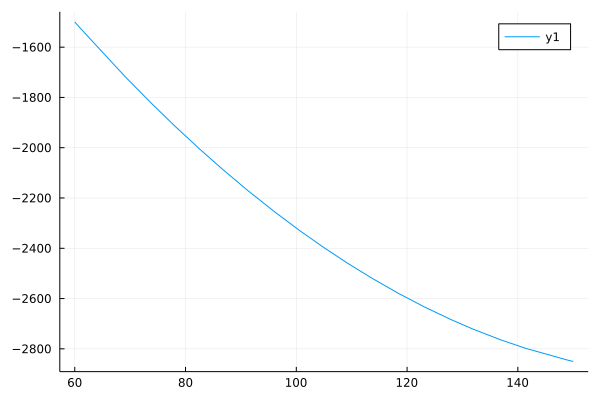


Function q(x) evaluated in range [60:150]



(process:13520): GLib-GIO-WARNING **: 01:47:54.624: Unexpectedly, UWP app `38526MediaLife.ZipPlus_2.0.4.0_x86__1crh1k73ty8mg' (AUMId `38526MediaLife.ZipPlus_1crh1k73ty8mg!ZipExtractor') supports 89 extensions but has no verbs


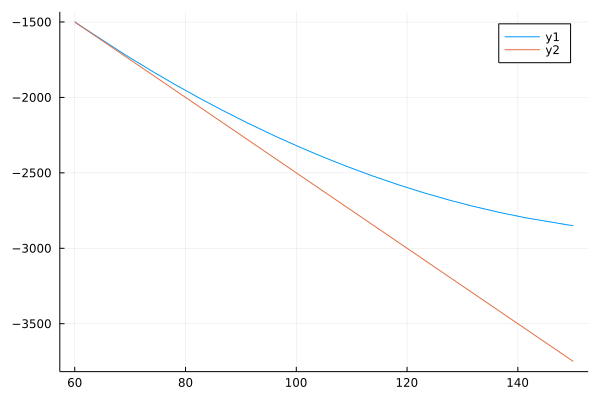

Iteration 1: x̂1: 0.0 | Lower Bound: -9999.0 & Uper Bound: 0.0

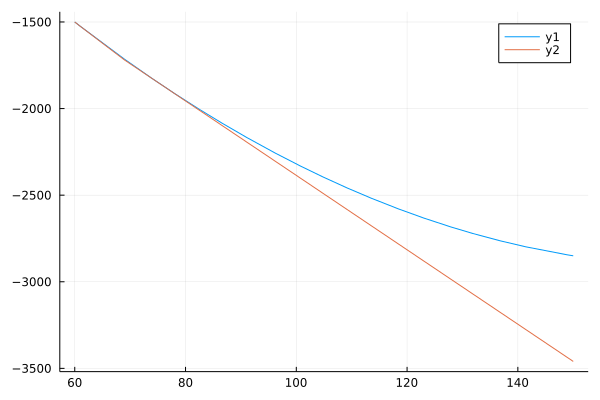


Iteration 2: x̂2: 75.0 | Lower Bound: -2250.0 & Uper Bound: -1098.6263736263736

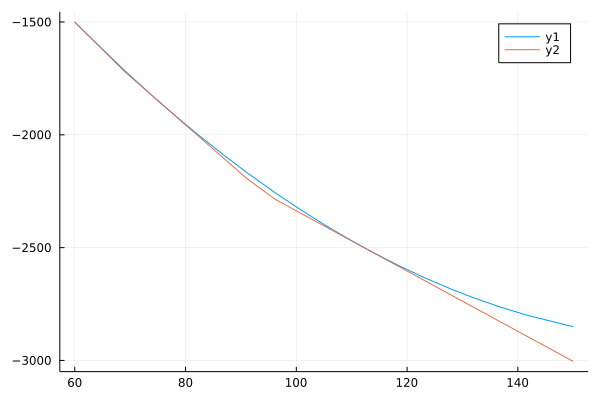


Iteration 3: x̂3: 112.5 | Lower Bound: -1959.8901098901097 & Uper Bound: -1378.8186813186812

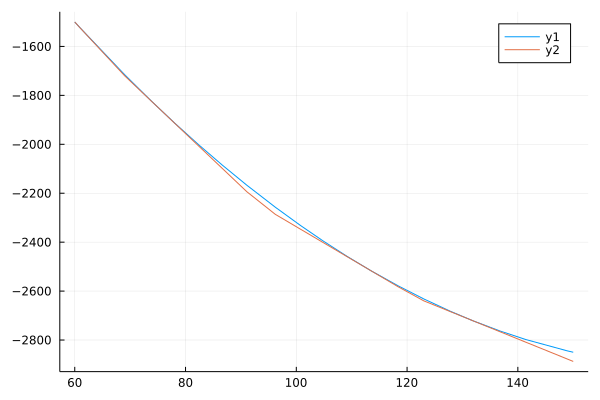


Iteration 4: x̂4: 131.24999999999991 | Lower Bound: -1504.5054945054944 & Uper Bound: -1403.0357142857147


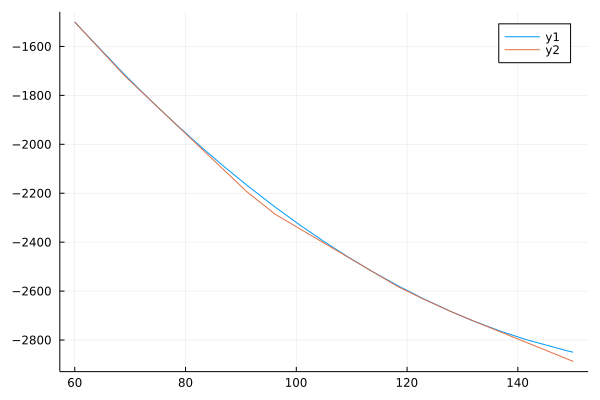

Iteration 5: x̂5: 126.62500000000054 | Lower Bound: -1410.6593406593406 & Uper Bound: -1404.2376373626325

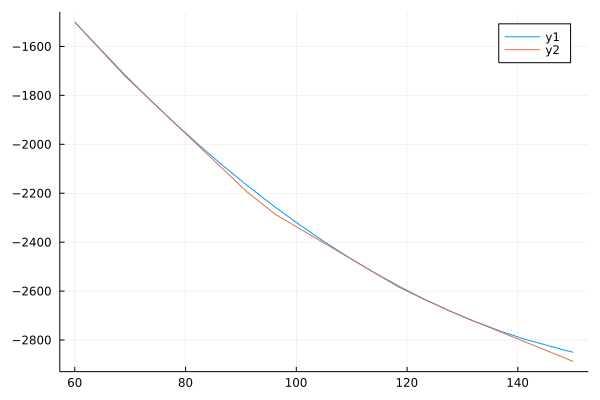


Iteration 6: x̂6: 127.81250000000288 | Lower Bound: -1404.8901098901067 & Uper Bound: -1404.3853021977968

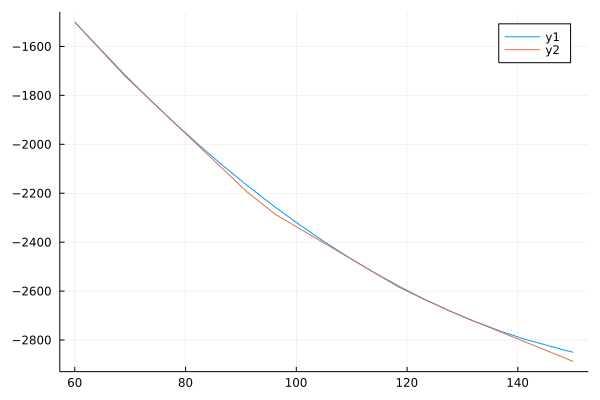


Iteration 7: x̂7: 128.65625000000122 | Lower Bound: -1404.4780219780168 & Uper Bound: -1404.2874313186785

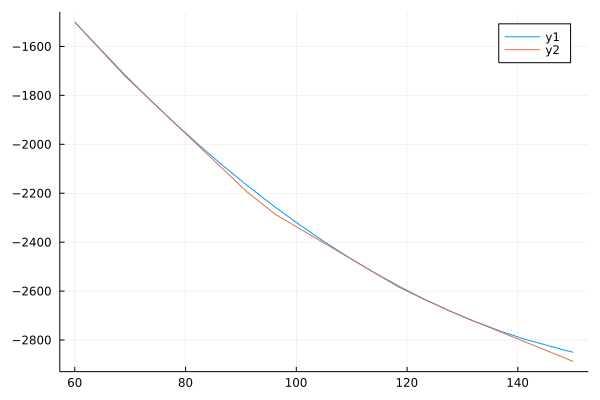


Iteration 8: x̂8: 128.32812500000492 | Lower Bound: -1404.3956043956 & Uper Bound: -1404.3415178571422

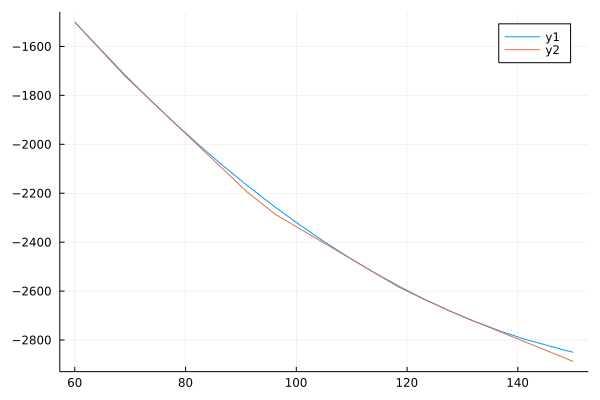


Iteration 9: x̂9: 128.16406249999824 | Lower Bound: -1404.3956043956 & Uper Bound: -1404.3685611263704

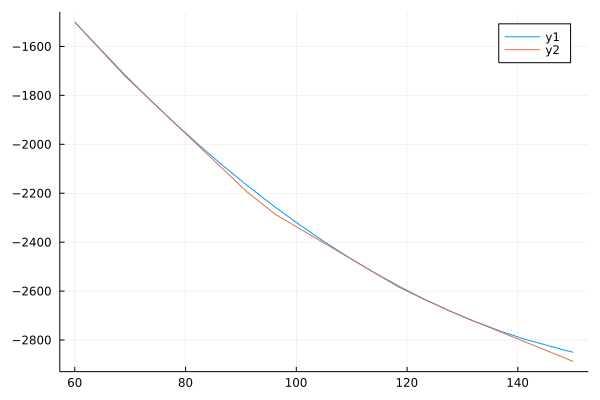


Iteration 10: x̂10: 128.0820312500027 | Lower Bound: -1404.3956043955998 & Uper Bound: -1404.3820827609845


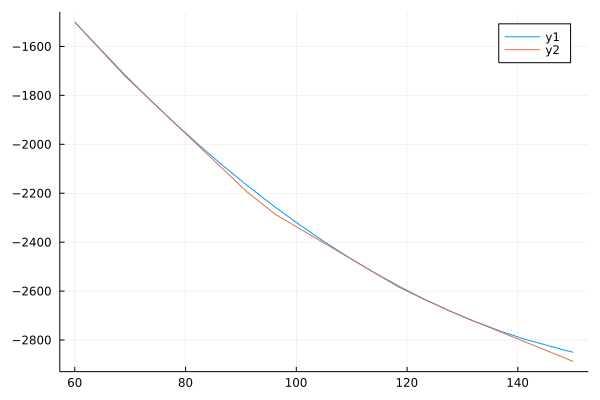

Iteration 11: x̂11: 128.04101562500628 | Lower Bound: -1404.395604395599 & Uper Bound: -1404.388843578292

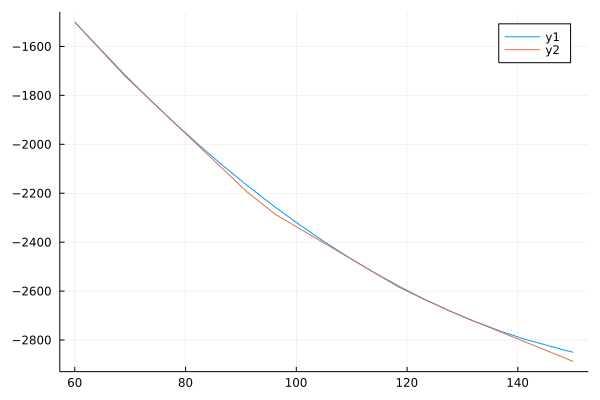


Iteration 12: x̂12: 128.02050781250742 | Lower Bound: -1404.395604395599 & Uper Bound: -1404.392223986947

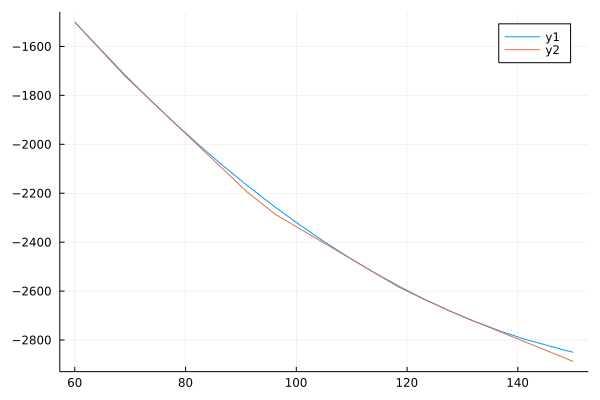


Iteration 13: x̂13: 128.01025390625514 | Lower Bound: -1404.395604395599 & Uper Bound: -1404.3939141912756

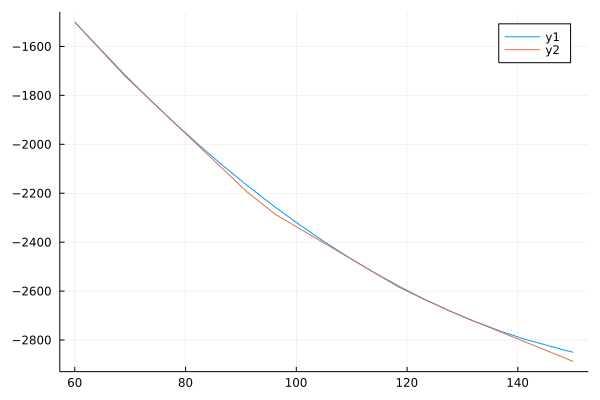


Iteration 14: x̂14: 128.005126953122 | Lower Bound: -1404.395604395599 & Uper Bound: -1404.3947592934364


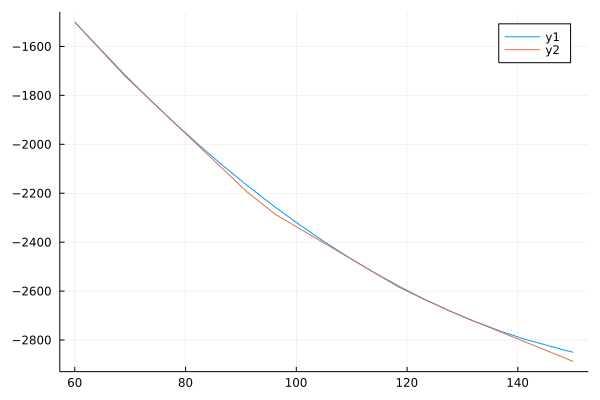

Iteration 15: x̂15: 128.0025634765653 | Lower Bound: -1404.395604395599 & Uper Bound: -1404.395181844517

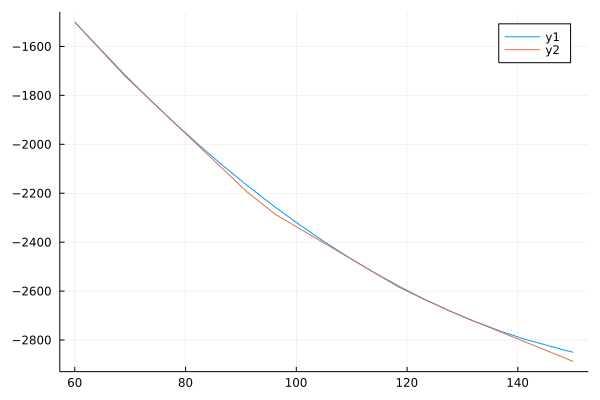


Iteration 16: x̂16: 128.00128173828486 | Lower Bound: -1404.3956043955984 & Uper Bound: -1404.3953931200624


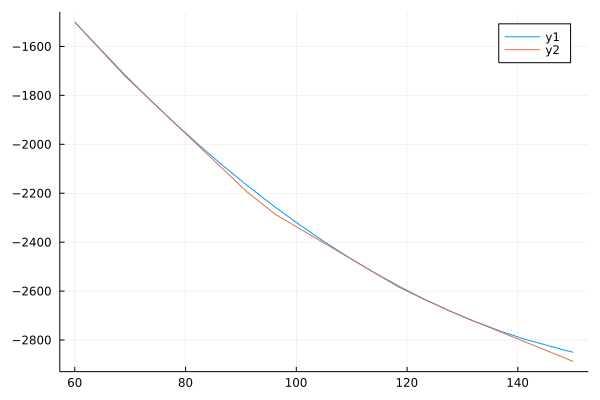

Iteration 17: x̂17: 128.00064086913272 | Lower Bound: -1404.3956043955984 & Uper Bound: -1404.395498757835

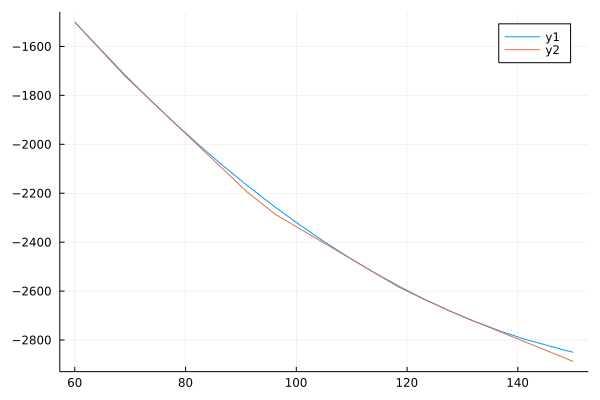


Iteration 18: x̂18: 128.00032043455315 | Lower Bound: -1404.3956043955984 & Uper Bound: -1404.3955515767195

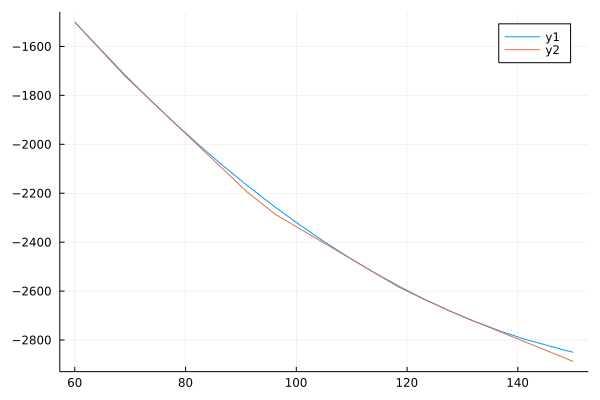


Iteration 19: x̂19: 128.00016021727106 | Lower Bound: -1404.3956043955984 & Uper Bound: -1404.3955779861658

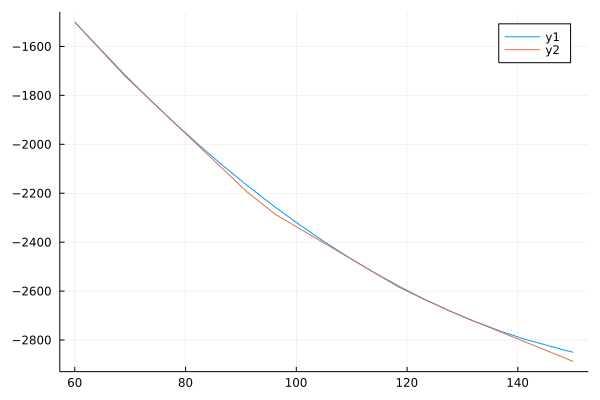


Iteration 20: x̂20: 128.00008010861808 | Lower Bound: -1404.3956043955984 & Uper Bound: -1404.3955911908897


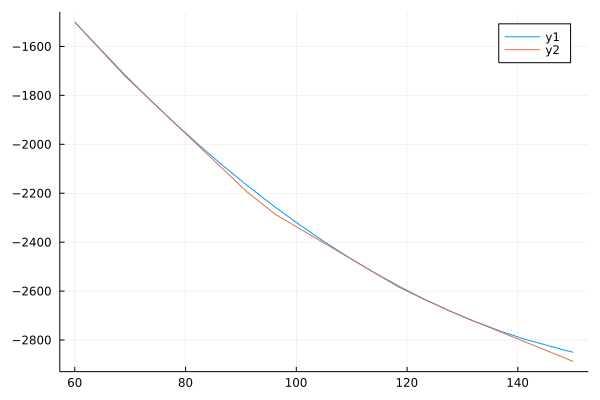

Iteration 21: x̂21: 128.00004005428877 | Lower Bound: -1404.3956043955984 & Uper Bound: -1404.3955977932478

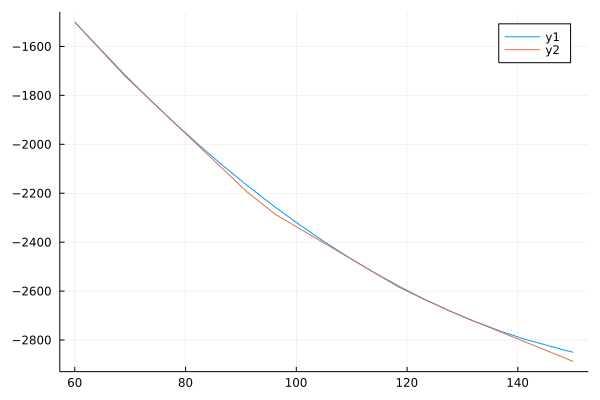


Iteration 22: x̂22: 128.00002002713606 | Lower Bound: -1404.3956043955984 & Uper Bound: -1404.3956010944314


In [5]:
l = [x->Q̂i_list[i] + πi_list[i]*(x-x̂i_list[i]) for i in 1:size(Q̂i_list,1)]
q̂_ = [x-> max(-9999,maximum(l[a](x) for a in 1:i)) for i in 1:size(Q̂i_list,1)]

println( "Function f(x) evaluated in range [60:150]")
println("===============================================================================================================")
f(x) = 10*x + sum(p[s]*Q(x,d[s])[1] for s = 1:size(d,1))
display(plot(f, 60,150))

println( "Function q(x) evaluated in range [60:150]")
println("===============================================================================================================")
q(x) = sum(p[s]*Q(x,d[s])[1] for s = 1:size(d,1))
display(plot(q, 60,150))


for i in 1:size(q̂_,1)
    plt = plot(q, 60,150)
    plot!(q̂_[i], 60, 150)
    println( "Iteration $(i): x̂$(i): $(x̂i_list[i]) | Lower Bound: $(LB_list[i]) & Uper Bound: $(UB_list[i])")
    println("===============================================================================================================")
    display(plt)
end